In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('data.csv')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

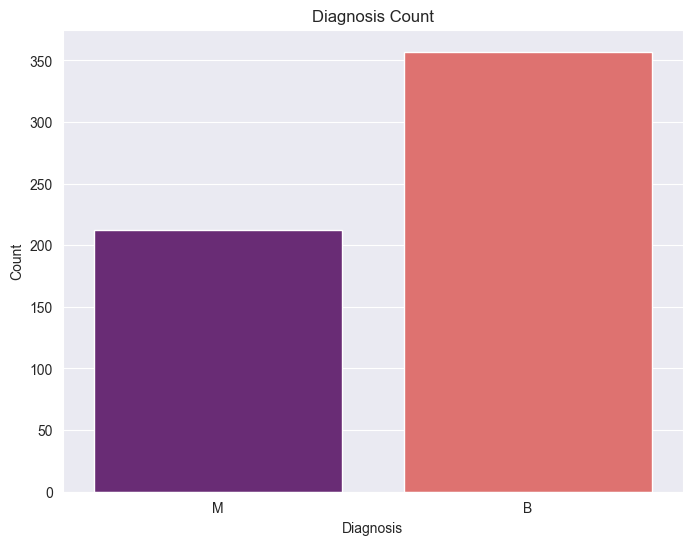

In [5]:
print("First few rows of the dataset:")
print(df_data.head())

print("\nMissing values in the dataset:")
print(df_data.isnull().sum())

df_data.drop(columns=['Unnamed: 32'], inplace=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_data, x='diagnosis', palette='magma', hue='diagnosis', legend=False)
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Counts of unique rows in the ‘diagnosis’ column
print("Counts of unique rows in the ‘diagnosis’ column:")
print(df_data['diagnosis'].value_counts())

# Map categorical values to numerical values
label_encoder = LabelEncoder()
df_data['diagnosis'] = label_encoder.fit_transform(df_data['diagnosis'])

# Splitting the data into train and test
X = df_data.drop(columns=['diagnosis'])
y = df_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement logistic regression
logistic_regression_model = LogisticRegression(max_iter=1000) 
logistic_regression_model.fit(X_train, y_train)

# Print the accuracy
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Counts of unique rows in the ‘diagnosis’ column:
diagnosis
B    357
M    212
Name: count, dtype: int64
Accuracy: 0.956140350877193


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Implement K Nearest Neighbours (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

# Implement Random Forests
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forests Accuracy:", rf_accuracy)

# Implement Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

# Compare accuracies and determine the best model
best_model = max(knn_accuracy, rf_accuracy, svm_accuracy)
if best_model == knn_accuracy:
    print("K Nearest Neighbours (KNN) is the best model.")
elif best_model == rf_accuracy:
    print("Random Forests is the best model.")
else:
    print("Support Vector Machines (SVM) is the best model.")

KNN Accuracy: 0.7543859649122807
Random Forests Accuracy: 0.9649122807017544
SVM Accuracy: 0.6228070175438597
Random Forests is the best model.
